In [5]:
import pandas as pd

matches = pd.read_csv(r"C:\Users\ADMIN\Downloads\Indian Premier League\matches.csv")
deliveries = pd.read_csv(r"C:\Users\ADMIN\Downloads\Indian Premier League\deliveries.csv")

matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [2]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
# Checking for missing values
matches.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
matches['winner'].fillna('No Result', inplace=True)

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
# Convert columns to string to avoid TypeError
matches['city'] = matches['city'].astype(str)
matches['venue'] = matches['venue'].astype(str)

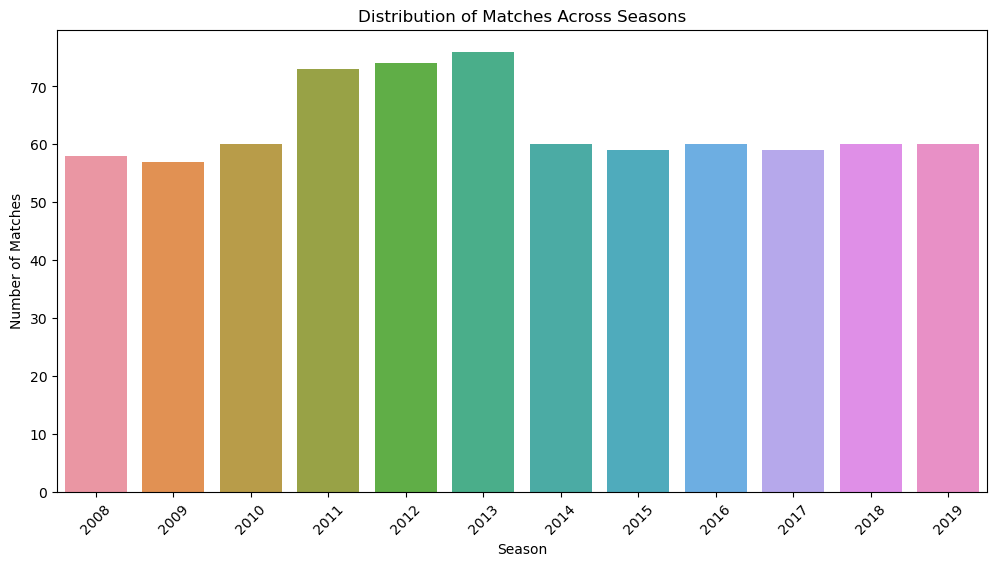

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of matches across seasons
plt.figure(figsize=(12, 6))
sns.countplot(data=matches, x='season')
plt.title('Distribution of Matches Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

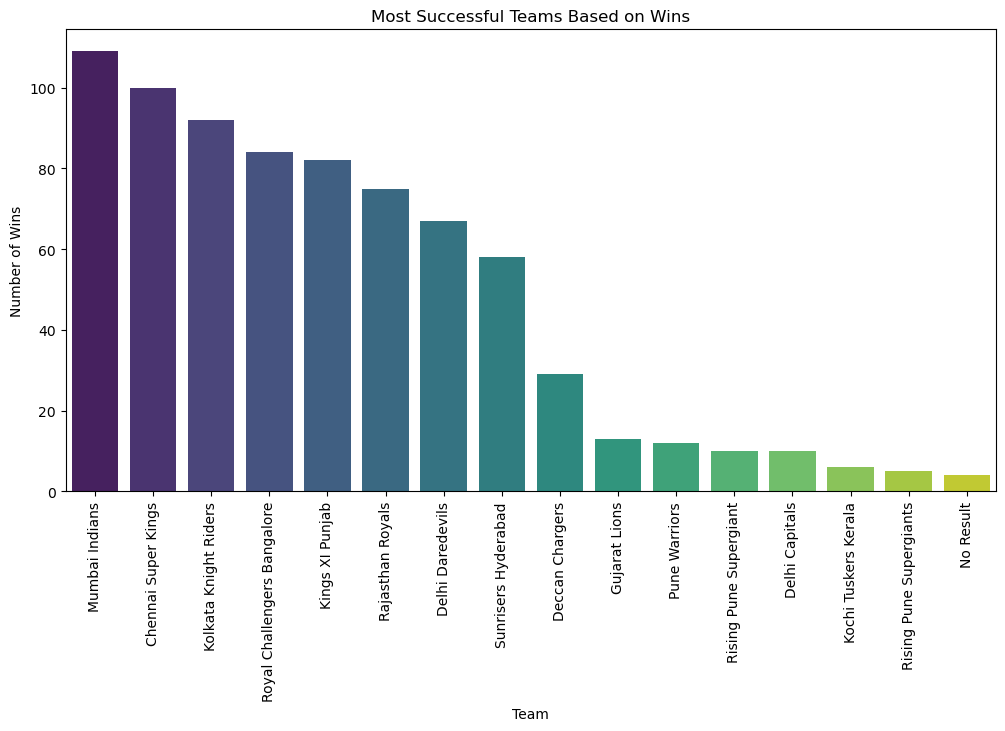

In [10]:
# Count of wins by each team
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

plt.figure(figsize=(12, 6))
sns.barplot(data=team_wins, x='Team', y='Wins', palette='viridis')
plt.title('Most Successful Teams Based on Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

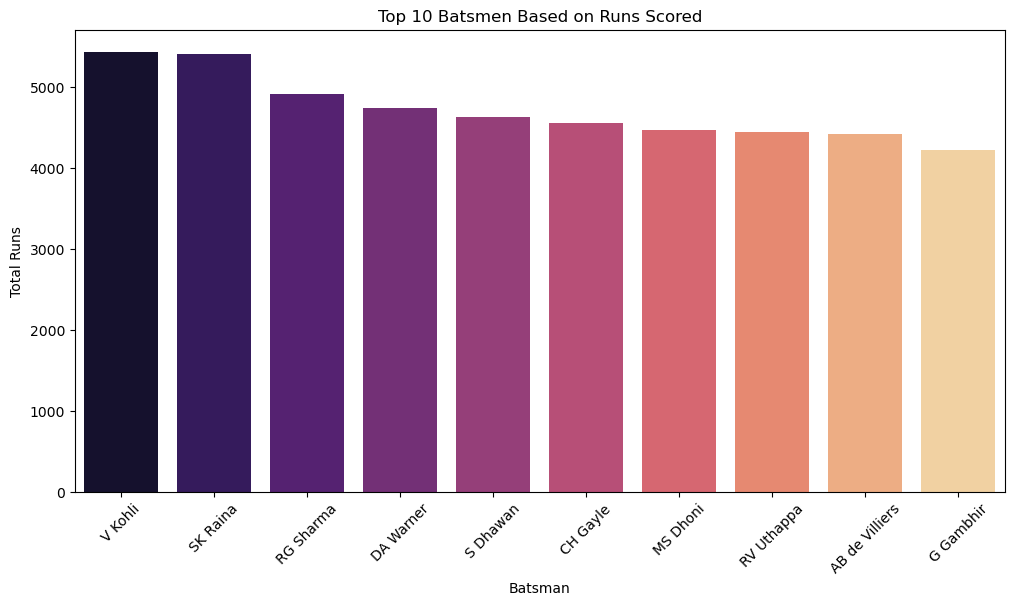

In [11]:
# Total runs scored by each batsman
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=batsman_runs, x='batsman', y='batsman_runs', palette='magma')
plt.title('Top 10 Batsmen Based on Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

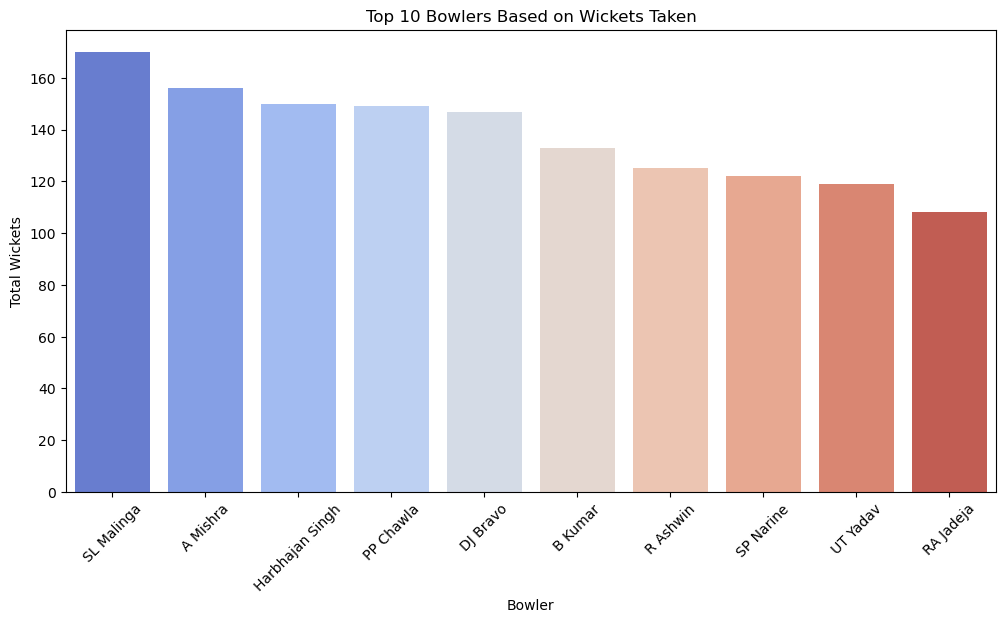

In [12]:
# Total wickets taken by each bowler
bowler_wickets = deliveries[deliveries['dismissal_kind'].notna() & (deliveries['dismissal_kind'] != 'run out')]
bowler_wickets = bowler_wickets.groupby('bowler')['dismissal_kind'].count().reset_index()
bowler_wickets.columns = ['Bowler', 'Wickets']
bowler_wickets = bowler_wickets.sort_values(by='Wickets', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=bowler_wickets, x='Bowler', y='Wickets', palette='coolwarm')
plt.title('Top 10 Bowlers Based on Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()


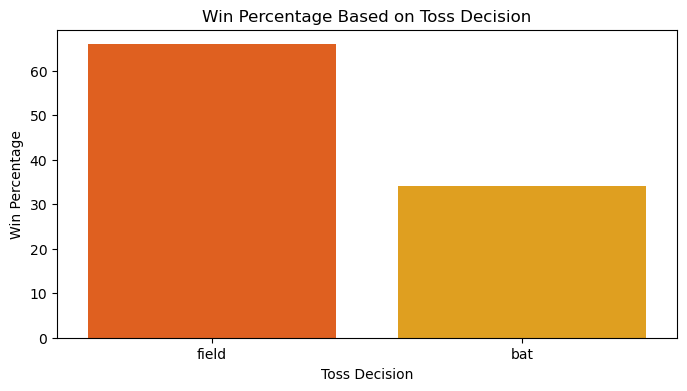

In [13]:
# Toss decision vs win percentage
toss_win = matches[matches['toss_winner'] == matches['winner']]
toss_decision_win = toss_win['toss_decision'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 4))
sns.barplot(x=toss_decision_win.index, y=toss_decision_win.values, palette='autumn')
plt.title('Win Percentage Based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Win Percentage')
plt.show()

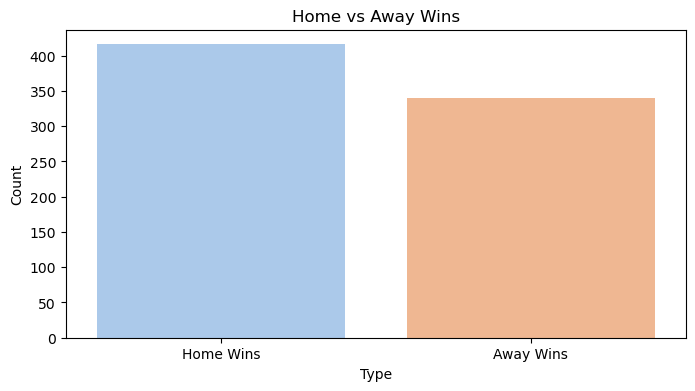

In [17]:
# Home vs Away games win percentage
matches['home_team'] = matches.apply(lambda x: x['team1'] if x['city'] in x['venue'] else x['team2'], axis=1)
home_wins = matches[matches['winner'] == matches['home_team']].shape[0]
away_wins = matches[matches['winner'] != matches['home_team']].shape[0]

home_away_win_percentage = pd.DataFrame({
    'Type': ['Home Wins', 'Away Wins'],
    'Count': [home_wins, away_wins]
})

plt.figure(figsize=(8, 4))
sns.barplot(data=home_away_win_percentage, x='Type', y='Count', palette='pastel')
plt.title('Home vs Away Wins')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()